# Two-Body decay generator

In [64]:
import numpy as np
import pandas as pd
import math

## Let's create 100000 rows
ran1 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])
ran2 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])

## Creating the dataframes
df_ran1 = pd.DataFrame(ran1, columns=["ran1"])
df_ran2 = pd.DataFrame(ran2, columns=["ran2"])

df = pd.concat([df_ran1, df_ran2], axis=1, join='outer')

df['theta'] = np.arccos(1.-2.*df['ran1'])
df['phi'] = 2.*math.pi*df['ran2']

a1 = 22370.3
a2 = 939.565
Ed = 5

Ex = a1+a2+Ed
p1 = math.sqrt(abs((Ex*Ex - (a1+a2)*(a1+a2))*(Ex*Ex - (a1-a2)*(a1-a2))))/(2.*Ex);

df['pfx'] = p1*np.sin(df['theta'])*np.cos(df['phi'])
df['pfy'] = p1*np.sin(df['theta'])*np.sin(df['phi'])
df['pfz'] = p1*np.cos(df['theta'])
df['Ef'] = np.sqrt(a1*a1+p1*p1)

df['pnx'] = -df['pfx']
df['pny'] = -df['pfy']
df['pnz'] = -df['pfz']
df['En'] = np.sqrt(a2*a2+p1*p1)

#ZBOOST
beta = 0.49
gamma = 1./math.sqrt(1.-beta*beta)
c = 0.299792 #m/ns

df['pnz_b'] = gamma*(df['pnz']+beta*df['En'])
df['En_b'] = gamma*(beta*df['pnz']+df['En'])

df['pfz_b'] = gamma*(df['pfz']+beta*df['Ef'])
df['Ef_b'] = gamma*(beta*df['pfz']+df['Ef'])

df['Erel'] = np.sqrt(a1*a1 + a2*a2 + 2*df['Ef']*df['En'] - 2.*(df['pfx']*df['pnx']+df['pfy']*df['pny']+df['pfz']*df['pnz'])) - a1 - a2
df['Erel_b'] = np.sqrt(a1*a1 + a2*a2 + 2*df['Ef_b']*df['En_b'] - 2.*(df['pfx']*df['pnx']+df['pfy']*df['pny']+df['pfz_b']*df['pnz_b'])) - a1 - a2

df['Bf'] = np.sqrt(1.-(a1*a1/(df['Ef_b']*df['Ef_b'])))
df['Bn'] = np.sqrt(1.-(a2*a2/(df['En_b']*df['En_b'])))

#position/time at Z=8m
df['nt'] = 8.*np.sqrt(1.+(a2*a2)/(df['pnz_b']*df['pnz_b']))/c
#df['Bnz'] = 1./np.sqrt(1.+(a2*a2)/(df['pnz_b']*df['pnz_b']))
df['nx'] = df['pnx']*df['nt']*c/np.sqrt(1.+(a2*a2)/(df['pnx']*df['pnx']))/abs(df['pnx'])
df['ny'] = df['pny']*df['nt']*c/np.sqrt(1.+(a2*a2)/(df['pny']*df['pny']))/abs(df['pny'])

df 

,ran1,ran2,theta,phi,pfx,pfy,pfz,Ef,pnx,pny,...,En_b,pfz_b,Ef_b,Erel,Erel_b,Bf,Bn,nt,nx,ny
0,0.036154,0.116315,0.382616,0.730828,26.430835,23.692856,88.199136,22370.502031,-26.430835,-23.692856,...,1033.752670,12675.760901,25711.991297,5.0,5.0,0.492992,0.417041,64.167028,-0.540934,-0.484936
1,0.426673,0.588049,1.423611,3.694823,-80.017171,-49.415301,13.943044,22370.502031,80.017171,49.415301,...,1075.492430,12590.577717,25670.251537,5.0,5.0,0.490487,0.486620,55.531691,1.412694,0.874371
2,0.176079,0.489195,0.866047,3.073702,-72.257922,4.913200,61.592866,22370.502031,72.257922,-4.913200,...,1048.708201,12645.239408,25697.035765,5.0,5.0,0.492097,0.444203,60.668509,1.394638,-0.095108
3,0.984218,0.226044,2.889672,1.420275,3.553674,23.430599,-92.072832,22370.502031,-3.553674,-23.430599,...,1135.084540,12468.961166,25610.659427,5.0,5.0,0.486867,0.561099,47.581364,-0.053952,-0.355614
4,0.927400,0.184426,2.595963,1.158784,19.758082,45.210331,-81.269134,22370.502031,-19.758082,-45.210331,...,1129.011722,12481.354672,25616.732245,5.0,5.0,0.487238,0.554474,48.231086,-0.303997,-0.694953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.954775,0.335332,2.712996,2.106953,-20.184209,33.967743,-86.474379,22370.502031,20.184209,-33.967743,...,1131.937618,12475.383455,25613.806348,5.0,5.0,0.487059,0.557689,47.914362,0.308511,-0.518970
99996,0.016254,0.225033,0.255675,1.413925,3.756359,23.748802,91.983217,22370.502031,-3.756359,-23.748802,...,1031.625617,12680.101825,25714.118350,5.0,5.0,0.493119,0.412933,64.709152,-0.077557,-0.490187
99997,0.309939,0.439176,1.180868,2.759424,-81.593240,32.794724,36.139691,22370.502031,81.593240,-32.794724,...,1063.015572,12616.040693,25682.728395,5.0,5.0,0.491239,0.467737,57.766719,1.498282,-0.604102
99998,0.721216,0.260749,2.029106,1.638333,-5.753963,85.067977,-42.063751,22370.502031,5.753963,-85.067977,...,1106.974159,12526.329290,25638.769807,5.0,5.0,0.488581,0.528764,50.859590,0.093374,-1.374863


<Figure size 640x480 with 0 Axes>

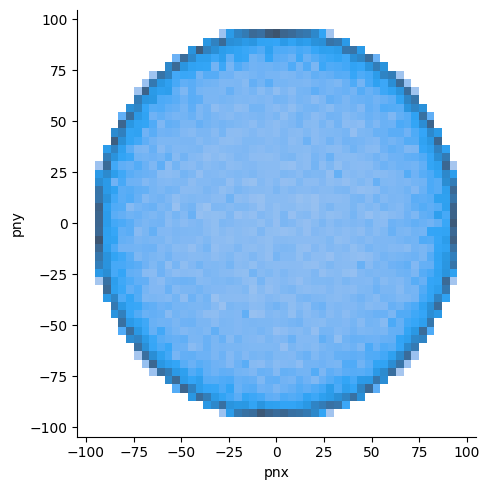

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="pnx", y="pny", data=df)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

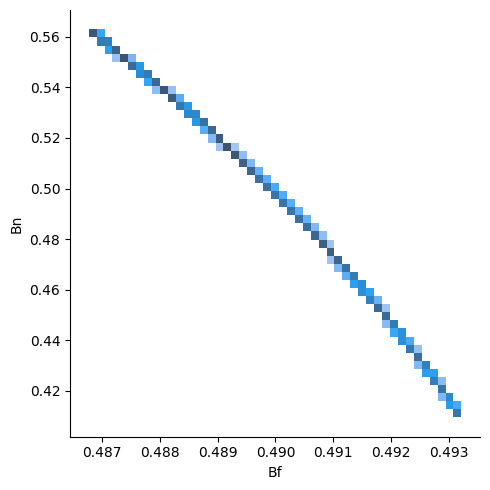

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="Bf", y="Bn", data=df)
plt.tight_layout()

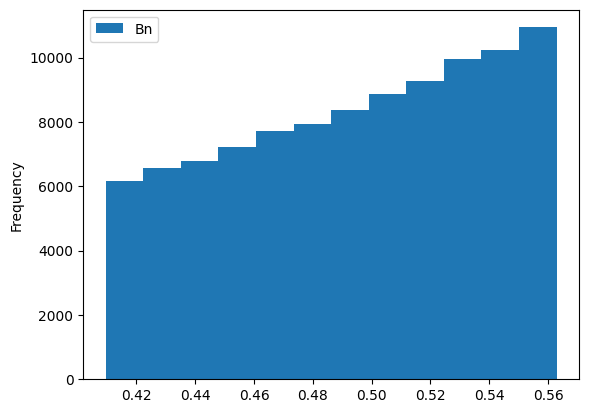

In [52]:
ax = df.plot.hist(column=['Bn'],bins=12)

<Figure size 640x480 with 0 Axes>

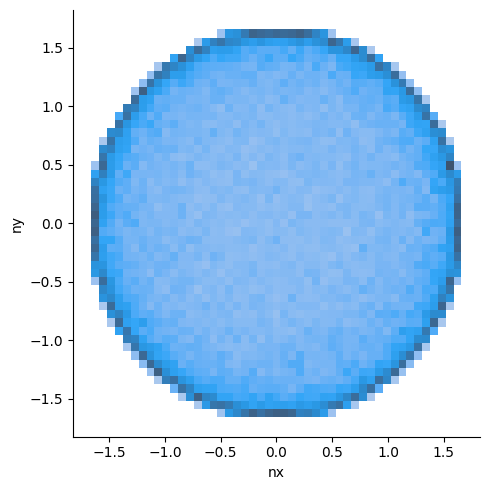

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nx", y="ny", data=df)
plt.tight_layout()

In [68]:
#sub dataframe taking into geometrical acceptance
df_acc = df[abs(df['nx']) <= 1.0]
df_acc = df_acc[abs(df_acc['ny']) <= 1.0]

<Figure size 640x480 with 0 Axes>

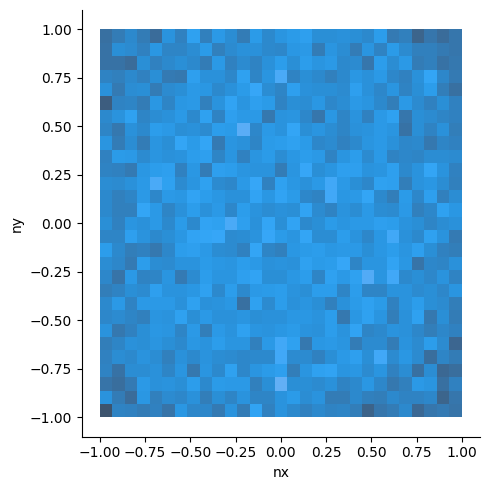

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nx", y="ny", data=df_acc)
plt.tight_layout()

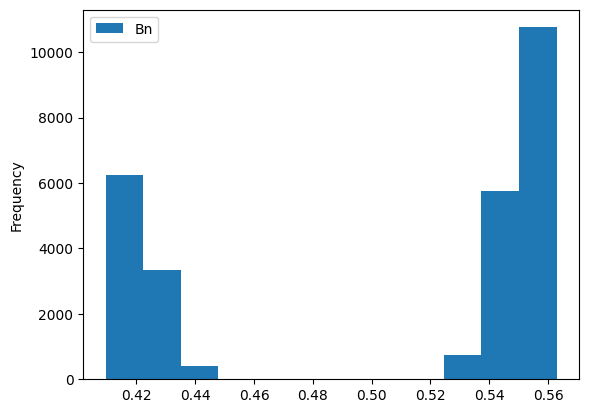

In [70]:
ax = df_acc.plot.hist(column=['Bn'],bins=12)

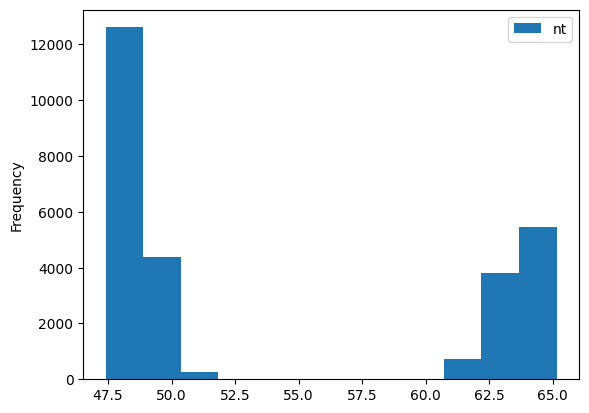

In [71]:
ax = df_acc.plot.hist(column=['nt'],bins=12)

<Figure size 640x480 with 0 Axes>

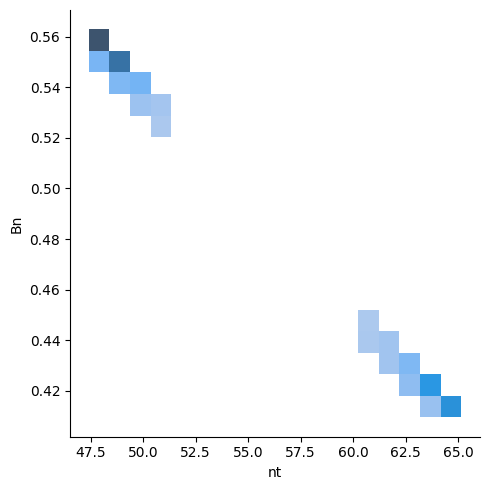

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nt", y="Bn", data=df_acc)
plt.tight_layout()